In [1]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("KM_Model.jl")
includet("../Scripts/Impurity.jl")

In [2]:
Nx = 10
Ny = 10
p = 1
q = 10
pn = 4
U = 1

N_Site = Nx*Ny
t = 1
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0

V = 10
NPin = 2

2

In [5]:
# PROJECTION CODE
matrix = KM(Nx, Ny, t, p, q)
H = Sp_Op(N_Site, matrix)
H_sp_Sub, Sub_Basis, P, Pt = H_sub(N_Site, H, Cut_Off)
lim = 1
H_MB, basis_cut_mb = H_Kin_MB(Sub_Basis, PN, H_sp_Sub, lim)
basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(Cut_Off, PN, lim)
H_Total = H_Total_Sub(P, Pt, basis_cut_mb, Cut_Off, U, H_MB);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:11


In [6]:
# PROJECTION CODE
num_sub_list = get_num_sub_list(N_Site, P, Pt)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb);

In [5]:
# WITHOUT PROJECTION
matrix = KM(Nx, Ny, t, p, q)
H = Sp_Op(N_Site, matrix)
lim = 1
basis_mb, basis_sp = get_Bosonic_MB_Basis(N_Site, pn, lim)
#H_MB, basis_mb = H_Kin_MB(basis_sp, pn, H, lim)
#H_Total = H_Total_fixed_prtcl(basis_sp, basis_mb, H_MB);

In [7]:
V0 = [V,V]; Imp_Site = [1,2]
Impurity_Data = Impurity(V0, Imp_Site)

Impurity([10.0, 10.0], [1, 2])

In [8]:
ParameterInfo(NPin, pn, Nx, Ny, p, q)

Lattice: 10x10
The Number of Flux per Unit-Cell (ϕ) = 1//10
Filling Fraction (ν) = 2//5 (The Number of Quasiholes = 2)
The Number of Flux Quanta = 8 (Delocalised Number = 0)
The Total Number of Particle = 4
The Number of State of Ground Degeneracy = 2


In [9]:
# PROJECTION CODE
Impurity_H = Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Data);

In [10]:
ϵ, λ = eigenstates(Impurity_H);

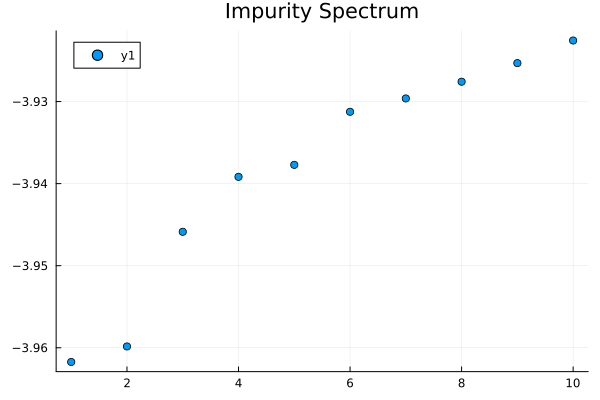

In [11]:
scatter(ϵ[1:10], title="Impurity Spectrum")